<a href="https://colab.research.google.com/github/alabarca/An-lisis-de-series-de-tiempo-econometr-a-bayesiana/blob/master/Challenge_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
# import necessary libraries
import pandas as pd
import re
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import itertools
import collections

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [44]:
url='tweets_by_keyword.csv'
df = pd.read_csv(url)

In [47]:
#filter non- english text
df=df[df['language']=='en']
#clean text
def clean_text(corpus):
    # make lowercase
    corpus = [tweet.lower() for tweet in corpus]
    # remove twitter account handles
    corpus = [re.sub(r'@\w+','',tweet) for tweet in corpus]
    # remove hashtag symbols but keep hashtag words
    corpus = [re.sub(r'#\w+','',tweet) for tweet in corpus]
    # remove urls
    corpus = [re.sub(r'http\S+','',tweet) for tweet in corpus]
    # remove numbers
    corpus = [re.sub(r'\d+','',tweet) for tweet in corpus]

    # remove punctuation
    corpus = [re.sub(r'[^\w\s]','',tweet) for tweet in corpus]

    # filter out specific characters
    corpus = [re.sub(r' amp ',' ',tweet) for tweet in corpus]
    # remove extra whitespace
    corpus = [tweet.strip() for tweet in corpus]
    corpus = [re.sub(r'\s{2,}',' ',tweet) for tweet in corpus]

    return corpus

df['clean_tweet'] = clean_text(df.tweet)
df.reset_index(inplace=True, drop=True)
  

In [48]:
# function tokenize to get the tokens for each tweet 
def get_tokens(corpus):
    corpus = [word_tokenize(tweet) for tweet in corpus]

    return corpus
df['tokenized'] = get_tokens(df.clean_tweet)



In [49]:
# Specify the Stemmer you will use 
stemmer = PorterStemmer()

# function to get stems of all words in each tweet
def get_stem(corpus):
    stemmed_corpus = []
    for tweet in corpus:
        tweet = [stemmer.stem(word) for word in tweet]
        stemmed_corpus.append(tweet)

    return stemmed_corpus

# apply function to the tokens 
df['stemmed'] = get_stem(df.tokenized)

In [50]:
#stop word
english_stop_words = stopwords.words('english')

# function to remove stopwords 
def remove_stopwords(corpus):
    corpus_no_stops = []
    for tweet in corpus:
        no_stops = [word for word in tweet if word not in english_stop_words]
        corpus_no_stops.append(no_stops)
        
    return corpus_no_stops

In [51]:
df['final_text'] = remove_stopwords(df.stemmed)

In [52]:
all_words = list(itertools.chain(*df.final_text))

# count how many times each word occurs
word_counts = collections.Counter(all_words)

# Top 15 most common words
word_counts.most_common(15)

[('wa', 1782),
 ('dure', 1361),
 ('protest', 971),
 ('iran', 959),
 ('regim', 750),
 ('hi', 683),
 ('arrest', 658),
 ('forc', 638),
 ('tortur', 634),
 ('physic', 628),
 ('secur', 624),
 ('singer', 607),
 ('sever', 607),
 ('mental', 606),
 ('detent', 605)]

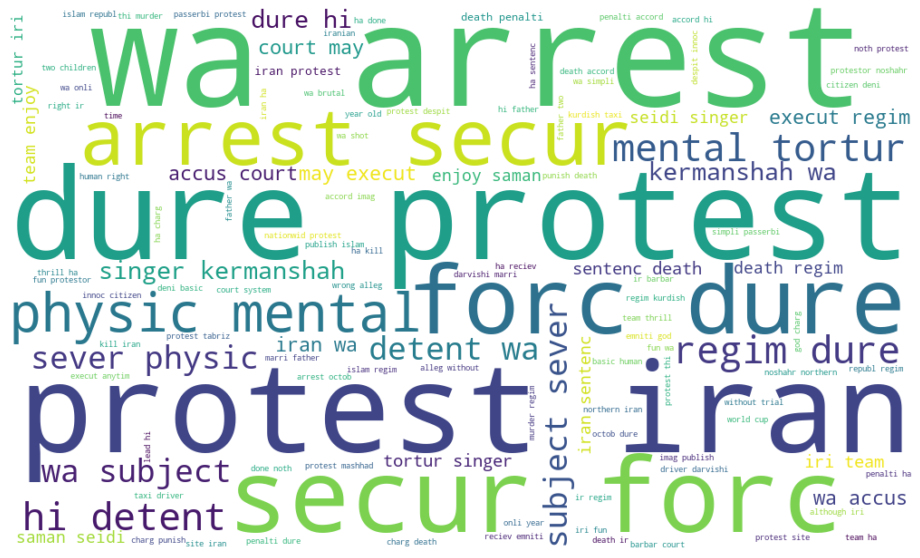

In [53]:
corpus_of_all_tweets = " ".join([" ".join([word for word in tweet]) for tweet in df.final_text])

wordcloud = WordCloud(max_words=120, background_color="white", width=1000, height=600).generate(corpus_of_all_tweets)

plt.figure(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()